# How to use CGM model interface

In [10]:
from astropy import units as un, constants as cons
import numpy as np
import matplotlib.pyplot as plt
import cgm_model_interface as CMI

# Cooling module

In [11]:
#this example initializes cooling module for the collisional ionisation equilibrium
import CloudyCooling as CC
cooling = CC.CIE()

# Halo potential

In [12]:
#this example initializes an NFW potential
import HaloPotential as Halo
z=0.01
Mvir=2e13*un.M_sun
cvir=5
potential = Halo.NFW(Mvir=Mvir,z=z,cvir=cvir)

# Boundary conditions module

In [ ]:
#setting boundary conditions
import Boundary as BC
Rout=[300]*un.kpc #outer boundary  
Tout=[0.2]*un.keV #temperature boundary
boundary = BC.Boundary(Rout=Rout,T=Tout)

# Metallicity module

In [ ]:
# this example initializes the uniform metallicity profile
import Metallicity as Metal
metallicity_uniform = Metal.Uniform_Metallicity(Zuniform=0.3)

In [15]:
# this example initializes the power law metallicity profile
import Metallicity as Metal
metallicity_PowerLaw = Metal.PowerLaw_Metallicity(Rcore=100*un.kpc,Zcore=0.3,slope=0.2) #to run it a small change in coolingflow.py file is made

# Precipitation model

In [ ]:
#this example initializes precipitation-limited NFW model with uniform metallicity
import PrecipitationModel as Precipitation
tcool_tff=20
precipitation_with_uniform_metallicity = Precipitation.pNFW(potential=potential,cooling=cooling,metallicity=
                                   metallicity_uniform,boundary=boundary,
                                   tcool_tff=tcool_tff,z=z)

In [ ]:
#this example initializes precipitation-limited NFW model with power law metallicity
import PrecipitationModel as Precipitation
tcool_tff=20
precipitation_with_powerlaw_metallicity = Precipitation.pNFW(potential=potential,cooling=cooling,metallicity=
                                   metallicity_PowerLaw,boundary=boundary,
                                   tcool_tff=tcool_tff,z=z)

# Cooling Flow Model

In [19]:
import CoolingFlow as CF
from importlib import reload
reload(CF)

<module 'CoolingFlow' from 'C:\\Users\\Neeli\\Downloads\\priyanka_mam\\scam_cgm\\CoolingFlow.py'>

In [20]:
Mdot   = 1*un.Msun/un.yr
R_circ = 10*un.kpc
cf_with_uniform_metallicity = CF.CoolingFlow(potential,cooling,metallicity_uniform,None,
                    Mdot = Mdot,R_circ=R_circ,pr=True,return_all_results=False)

Integrated with log T(R_circ)=5.00, maximum radius reached 121 kpc, stop reason: sonic point
Integrated with log T(R_circ)=5.50, maximum radius reached 165 kpc, stop reason: unbound
Integrated with log T(R_circ)=5.25, maximum radius reached 372 kpc, stop reason: sonic point
Integrated with log T(R_circ)=5.38, maximum radius reached 604 kpc, stop reason: unbound


C:\Users\Neeli\Downloads\priyanka_mam\scam_cgm\CoolingFlow.py:282: RuntimeWarning: overflow encountered in scalar power
  rho,T=e**ln_rho*un.g/un.cm**3, e**ln_T*un.K
C:\Users\Neeli\AppData\Local\Programs\Python\Python311\Lib\site-packages\astropy\units\quantity.py:671: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
C:\Users\Neeli\AppData\Local\Programs\Python\Python311\Lib\site-packages\astropy\units\quantity.py:671: RuntimeWarning: invalid value encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
C:\Users\Neeli\AppData\Local\Programs\Python\Python311\Lib\site-packages\astropy\units\quantity.py:671: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Integrated with log T(R_circ)=5.31, maximum radius reached 878 kpc, stop reason: sonic point
Integrated with log T(R_circ)=5.34, maximum radius reached 999 kpc, stop reason: max R reached


In [21]:
Mdot   = 1*un.Msun/un.yr
R_circ = 10*un.kpc
cf_with_power_law_metallicity = CF.CoolingFlow(potential,cooling,metallicity_PowerLaw,None,
                    Mdot = Mdot,R_circ=R_circ,pr=True,return_all_results=False)

Integrated with log T(R_circ)=5.00, maximum radius reached 108 kpc, stop reason: sonic point
Integrated with log T(R_circ)=5.50, maximum radius reached 182 kpc, stop reason: unbound
Integrated with log T(R_circ)=5.25, maximum radius reached 301 kpc, stop reason: sonic point
Integrated with log T(R_circ)=5.38, maximum radius reached 999 kpc, stop reason: max R reached


# Plotting results 

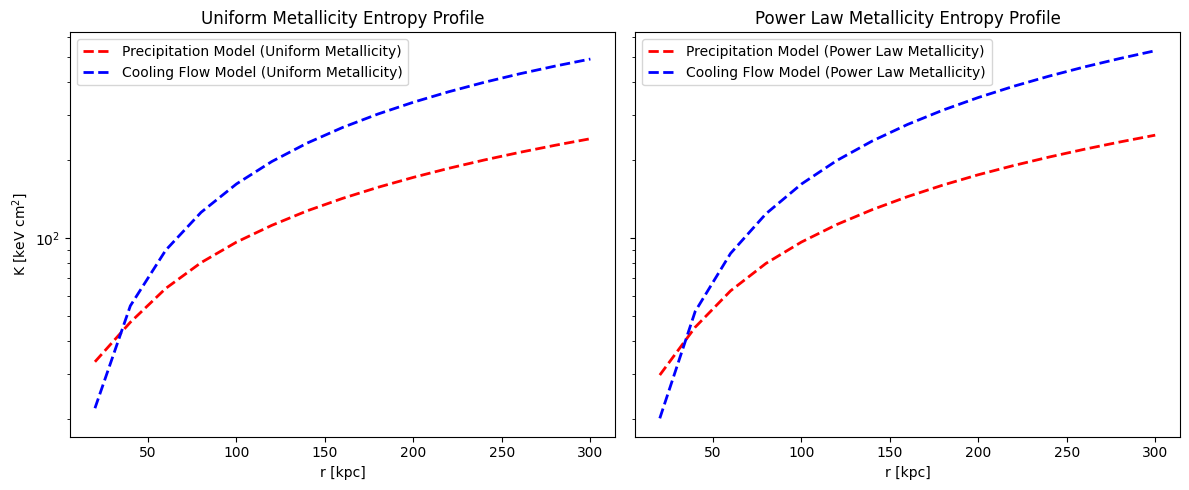

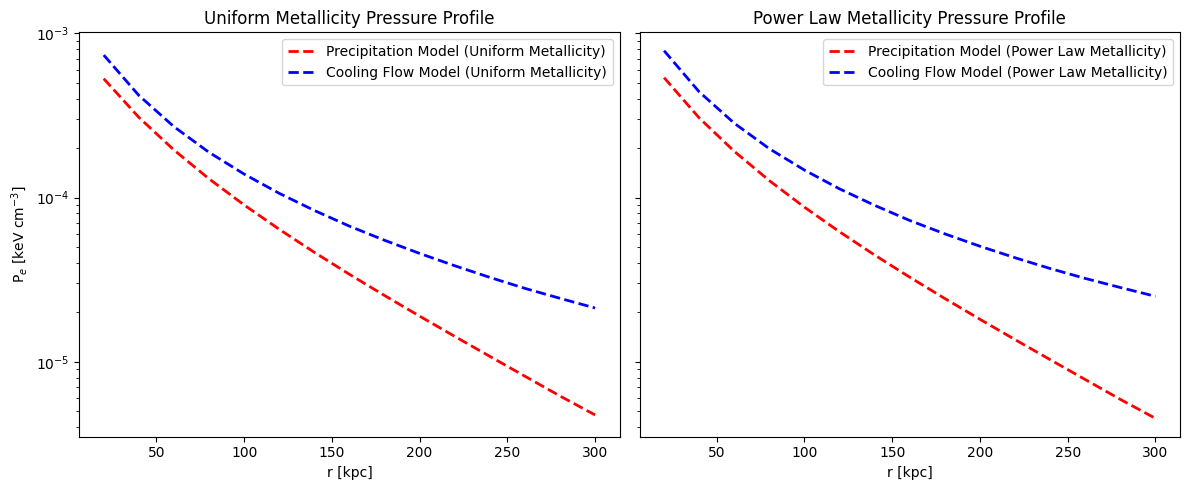

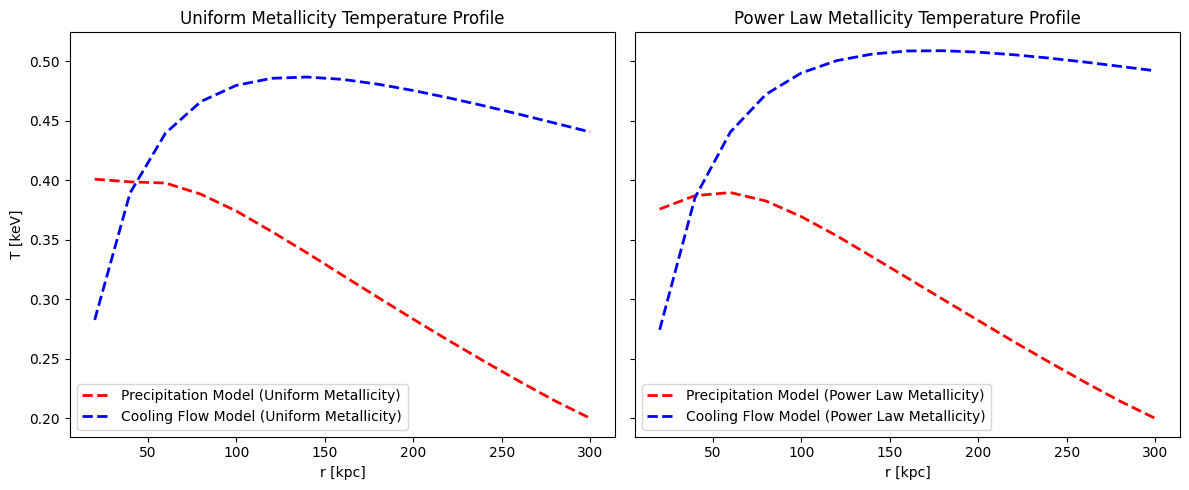

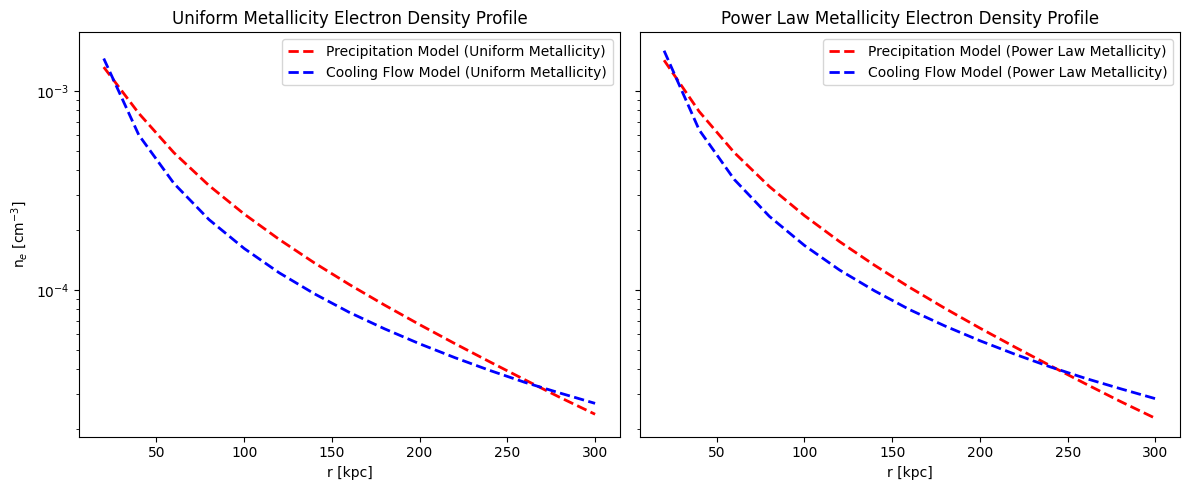

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Define radius range
r_min = 20 * un.kpc
r_max = 300 * un.kpc
n_points = 15
r = np.linspace(r_min, r_max, n_points)

# Define models
models_uniform = {
    "Precipitation Model (Uniform Metallicity)": precipitation_with_uniform_metallicity,
    "Cooling Flow Model (Uniform Metallicity)": cf_with_uniform_metallicity,
}

models_powerlaw = {
    "Precipitation Model (Power Law Metallicity)": precipitation_with_powerlaw_metallicity,
    "Cooling Flow Model (Power Law Metallicity)": cf_with_power_law_metallicity,
}

# Define colors (one for each model)
colors = ['r', 'b']  # Red for Precipitation, Blue for Cooling Flow

# Profile configurations
profiles = [
    {"func": lambda model, r: model.get_entropy_profile(r).to('keV*cm**2'),
     "ylabel": r'K [keV $\rm cm^2$]', "title": "Entropy Profile", "yscale": 'log'},

    {"func": lambda model, r: model.get_electron_thermal_pressure_profile(r).to('keV/cm**3'),
     "ylabel": r'P$_e$ [keV $\rm cm^{-3}$]', "title": "Pressure Profile", "yscale": 'log'},

    {"func": lambda model, r: model.get_temperature_profile(r).to('keV'),
     "ylabel": r'T [keV]', "title": "Temperature Profile", "yscale": 'linear'},  # Temperature is usually linear

    {"func": lambda model, r: model.get_electron_density_profile(r),
     "ylabel": r'n$_e$ [$\rm cm^{-3}$]', "title": "Electron Density Profile", "yscale": 'log'}
]

# General function to plot profiles
def plot_profiles(profiles):
    for profile in profiles:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Uniform Metallicity (Left)
        for i, (label, model) in enumerate(models_uniform.items()):
            try:
                data = profile["func"](model, r)  # Call specific function on model
                axes[0].plot(r, data, ls='--', c=colors[i], lw=2, label=label)
            except AttributeError as e:
                print(f"Error in model {label}: {e}")

        axes[0].set_title(f"Uniform Metallicity {profile['title']}")
        axes[0].set_xlabel(r'r [kpc]')
        axes[0].set_ylabel(profile["ylabel"])
        axes[0].set_yscale(profile["yscale"])
        axes[0].legend()

        # Power Law Metallicity (Right)
        for i, (label, model) in enumerate(models_powerlaw.items()):
            try:
                data = profile["func"](model, r)  # Call specific function on model
                axes[1].plot(r, data, ls='--', c=colors[i], lw=2, label=label)
            except AttributeError as e:
                print(f"Error in model {label}: {e}")

        axes[1].set_title(f"Power Law Metallicity {profile['title']}")
        axes[1].set_xlabel(r'r [kpc]')
        axes[1].set_yscale(profile["yscale"])
        axes[1].legend()

        plt.tight_layout()
        plt.show()

# Call the function to plot all profiles
plot_profiles(profiles)
